In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pprint as pp
import scikitplot as skplt
from collections import Counter
import seaborn as sns
from sklearn.metrics import make_scorer
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB,BaseNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import LinearSVC,LinearSVR
from sklearn.svm import NuSVC,NuSVR
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import (RandomForestClassifier,
                              RandomForestRegressor,
                              GradientBoostingClassifier,
                              GradientBoostingRegressor,
                              AdaBoostClassifier)
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV

from sklearn.model_selection import train_test_split
from sklearn.metrics import (roc_curve,
                             auc,
                             confusion_matrix,
                             recall_score,
                             roc_auc_score,
                             accuracy_score,
                             balanced_accuracy_score,
                             classification_report,
                             f1_score,
                             precision_recall_fscore_support)
from sklearn.preprocessing import label_binarize,OneHotEncoder,MinMaxScaler,StandardScaler
from imblearn.over_sampling import SMOTE
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, StratifiedKFold
import itertools
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_validate
%matplotlib inline

In [4]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
   

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",verticalalignment ="center",fontsize=30,multialignment="center"
                 ,color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [5]:
# some global variables
n_neighbors = 3
models = {'Naive Bayes':[],
          'KNN':[],
          'LDA':[],
          'QDA':[],
          'Linear SVM':[],
          'Non Linear SVM':[],
          'Logistic Regression':[],
          'CART':[],
          'Random Forest':[],
          'AdaBoost':[],
          'GradBoost':[]}

In [7]:
#Loading the data
flame = pd.read_csv('D:/m2/app_sup/projet_app_sup_20/Datasets_projet_MLDS/flame.txt',delimiter='\t')
flame

,1.85,27.8,1
0,1.35,26.65,1
1,1.40,23.25,2
2,0.85,23.05,2
3,0.50,22.35,2
4,0.65,21.35,2
...,...,...,...
234,7.50,26.20,1
235,7.50,25.65,1
236,7.05,25.85,1
237,6.90,27.15,1


In [ ]:
x = flame.values[:,:-1] #returns a numpy array
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
flame = pd.concat([pd.DataFrame(x_scaled),flame.iloc[:,-1]],axis=1)
flame

In [13]:
def results_report(model,y_true):
    metrics={'acc':0,
         'bal_acc':0,
         'recall':0,
         'f_1_score':0,
         'roc_auc_score':0}
    y_pred = model.predict(x_te)
    metrics['acc']=accuracy_score(y_te,y_pred)
    metrics['bal_acc']=accuracy_score(y_te,y_pred)
    metrics['recall']=recall_score(y_te,y_pred,average='macro')
    metrics['f_1_score']=f1_score(y_te,y_pred,average='macro')
    classes = list(set(y_true).union(set(y_pred)))
    metrics['roc_auc_score']=roc_auc_score(label_binarize(y_te,classes),label_binarize(y_pred,classes))
    
    plt.bar(metrics.keys(),metrics.values())
    plt.show()
    return metrics
    
def plot_curves(model,y_true,x_te):
    y_pred = model.predict(x_te)
    #y_pred = model.predict(x_te)
    cnf_matrix = confusion_matrix(y_true,y_pred)
    np.set_printoptions(precision=2)
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=['have_card','No_card'],
                      title='Confusion matrix')
    predict_proba = getattr(model, "predict_proba", None)
    if callable(predict_proba):
        y_probas = model.predict_proba(x_te)
        skplt.metrics.plot_roc(y_true, y_probas)
        skplt.metrics.plot_precision_recall_curve(y_true,y_probas)

Resampled dataset shape Counter({1.0: 153, 0.0: 86})


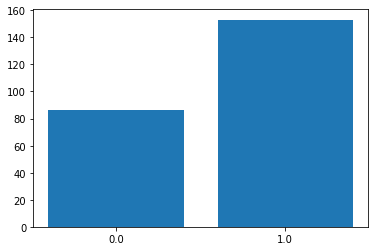

In [6]:
bl = Counter(flame.values[:,-1])
print('Resampled dataset shape %s' % bl)
plt.bar([str(k) for k in bl.keys()],bl.values(),align='center')
plt.show()

Resampled dataset shape Counter({1.0: 153, 2.0: 153})


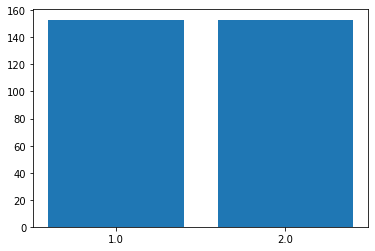

In [9]:
# ooversampling data
sm = SMOTE(random_state=42)
X, Y = sm.fit_resample(flame.values[:,:-1],flame.values[:,-1])
bl_os=Counter(Y)
print('Resampled dataset shape %s' % bl_os)
plt.bar([str(k) for k in bl_os.keys()],bl_os.values(),align='center')
plt.show()

In [10]:
# splittign the dataset
x_t,x_te,y_t,y_te = train_test_split(X,
                                     Y,
                                     test_size=0.33, 
                                     random_state=42)


# Naive Bayes classifier

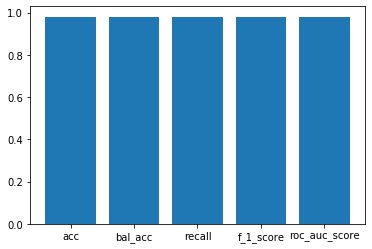

{'acc': 0.9801980198019802, 'bal_acc': 0.9801980198019802, 'recall': 0.9782608695652174, 'f_1_score': 0.9799603174603175, 'roc_auc_score': 0.9782608695652174}
              precision    recall  f1-score   support

         1.0       1.00      0.96      0.98        46
         2.0       0.96      1.00      0.98        55

    accuracy                           0.98       101
   macro avg       0.98      0.98      0.98       101
weighted avg       0.98      0.98      0.98       101



D:\annaconda\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=DeprecationWarning)


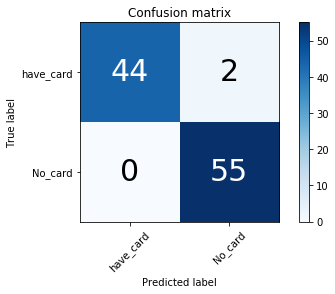

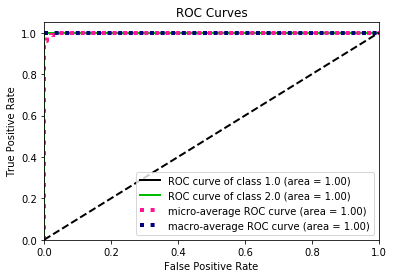

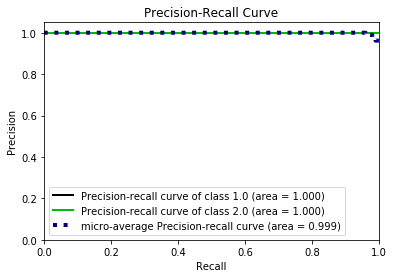

In [14]:
NB_model = GaussianNB()
# fitting the model
NB_model.fit(x_t,y_t)
#evaluating the model
r = results_report(NB_model,y_te)
print(r)
models['Naive Bayes']=r
y_pred = NB_model.predict(x_te)
print(classification_report(y_te,y_pred,labels=list(set(flame.values[:,-1]))))
plot_curves(NB_model,y_te,x_te)

# KNN Classifier

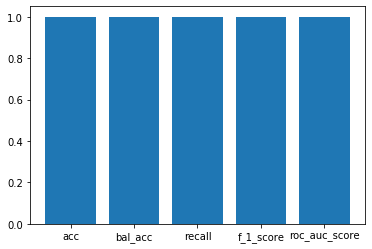

{'acc': 1.0, 'bal_acc': 1.0, 'recall': 1.0, 'f_1_score': 1.0, 'roc_auc_score': 1.0}
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        46
         2.0       1.00      1.00      1.00        55

    accuracy                           1.00       101
   macro avg       1.00      1.00      1.00       101
weighted avg       1.00      1.00      1.00       101



D:\annaconda\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=DeprecationWarning)


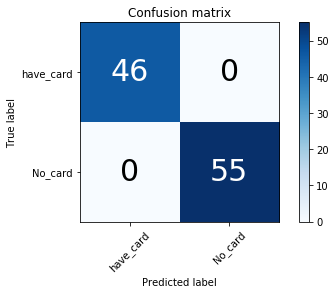

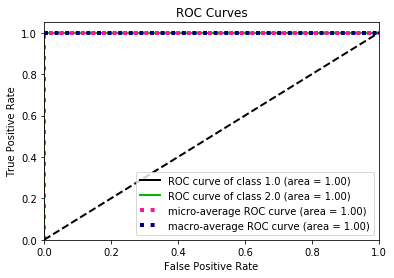

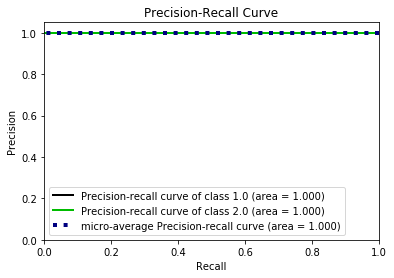

In [15]:
KNN_model = KNeighborsClassifier(n_neighbors)
KNN_model.fit(x_t,y_t)
#evaluating the model 
r = results_report(KNN_model,y_te)
print(r)
models['KNN']=r
y_pred = KNN_model.predict(x_te)
print(classification_report(y_te,y_pred,labels=list(set(flame.values[:,-1]))))
plot_curves(KNN_model,y_te,x_te)

# Linear Discriminant Analysis

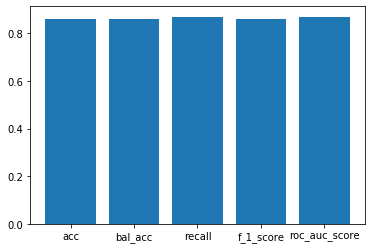

{'acc': 0.8613861386138614, 'bal_acc': 0.8613861386138614, 'recall': 0.8691699604743084, 'f_1_score': 0.8613725490196078, 'roc_auc_score': 0.8691699604743083}
              precision    recall  f1-score   support

         1.0       0.79      0.96      0.86        46
         2.0       0.96      0.78      0.86        55

    accuracy                           0.86       101
   macro avg       0.87      0.87      0.86       101
weighted avg       0.88      0.86      0.86       101



D:\annaconda\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=DeprecationWarning)


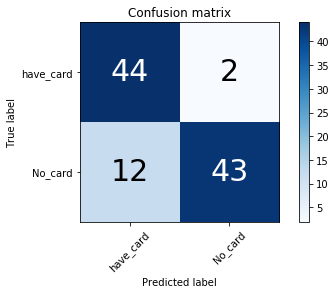

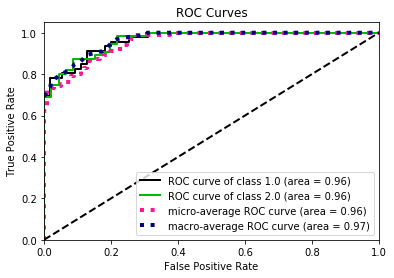

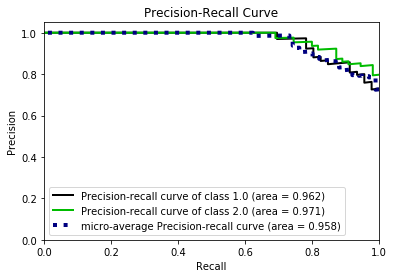

In [16]:
LDA_model = LinearDiscriminantAnalysis()
LDA_model.fit(x_t,y_t)
#evaluating the model 
r = results_report(LDA_model,y_te)
print(r)
models['LDA']=r
y_pred = LDA_model.predict(x_te)
print(classification_report(y_te,y_pred,labels=list(set(flame.values[:,-1]))))
plot_curves(LDA_model,y_te,x_te)

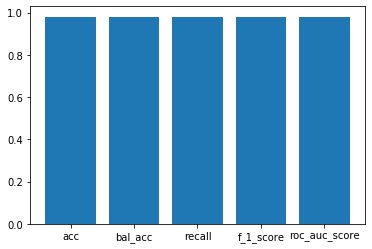

{'acc': 0.9801980198019802, 'bal_acc': 0.9801980198019802, 'recall': 0.9782608695652174, 'f_1_score': 0.9799603174603175, 'roc_auc_score': 0.9782608695652174}
              precision    recall  f1-score   support

         1.0       1.00      0.96      0.98        46
         2.0       0.96      1.00      0.98        55

    accuracy                           0.98       101
   macro avg       0.98      0.98      0.98       101
weighted avg       0.98      0.98      0.98       101



D:\annaconda\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=DeprecationWarning)


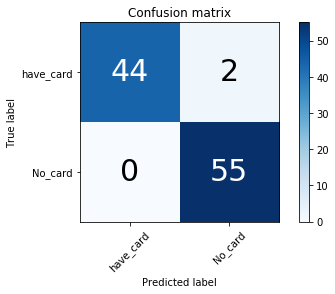

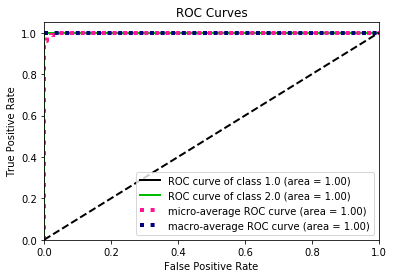

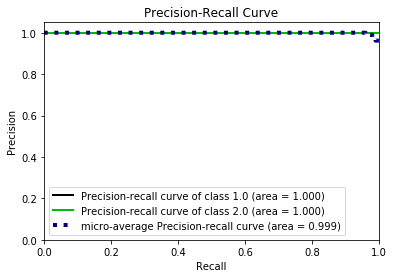

In [17]:
QDA_model = QuadraticDiscriminantAnalysis()
QDA_model.fit(x_t,y_t)
#evaluating the model 
r = results_report(QDA_model,y_te)
print(r)
models['QDA']=r
y_pred = QDA_model.predict(x_te)
print(classification_report(y_te,y_pred,labels=list(set(flame.values[:,-1]))))
plot_curves(QDA_model,y_te,x_te)

D:\annaconda\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


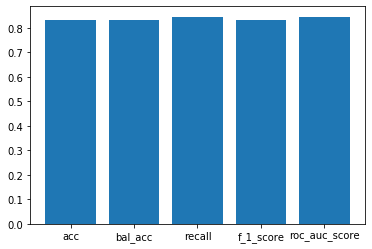

{'acc': 0.8316831683168316, 'bal_acc': 0.8316831683168316, 'recall': 0.8454545454545455, 'f_1_score': 0.8306204991614876, 'roc_auc_score': 0.8454545454545455}
              precision    recall  f1-score   support

         1.0       0.73      1.00      0.84        46
         2.0       1.00      0.69      0.82        55

    accuracy                           0.83       101
   macro avg       0.87      0.85      0.83       101
weighted avg       0.88      0.83      0.83       101



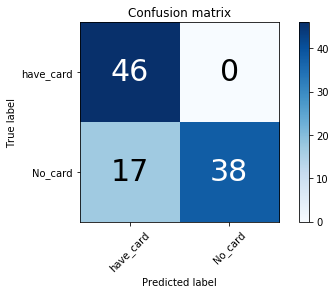

In [18]:
LSVM_model = LinearSVC()
LSVM_model.fit(x_t,y_t)
#evaluating the model 
r = results_report(LSVM_model,y_te)
print(r)
models['Linear SVM']=r
y_pred = LSVM_model.predict(x_te)
print(classification_report(y_te,y_pred,labels=list(set(flame.values[:,-1]))))
plot_curves(LSVM_model,y_te,x_te)

D:\annaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


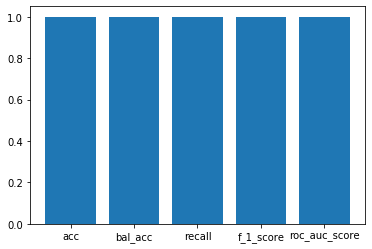

{'acc': 1.0, 'bal_acc': 1.0, 'recall': 1.0, 'f_1_score': 1.0, 'roc_auc_score': 1.0}
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        46
         2.0       1.00      1.00      1.00        55

    accuracy                           1.00       101
   macro avg       1.00      1.00      1.00       101
weighted avg       1.00      1.00      1.00       101



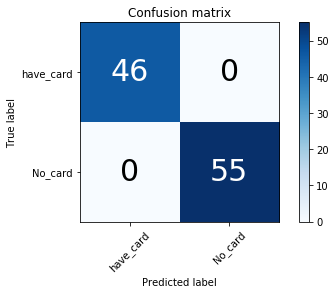

In [19]:
NLSVM_model = NuSVC()
NLSVM_model.fit(x_t,y_t)
#evaluating the model 
r = results_report(NLSVM_model,y_te)
print(r)
models['Non Linear SVM']=r
y_pred = NLSVM_model.predict(x_te)
print(classification_report(y_te,y_pred,labels=list(set(flame.values[:,-1]))))
plot_curves(NLSVM_model,y_te,x_te)

D:\annaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


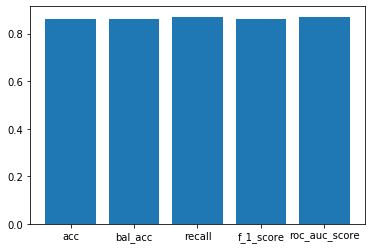

{'acc': 0.8613861386138614, 'bal_acc': 0.8613861386138614, 'recall': 0.8709486166007905, 'f_1_score': 0.8612637362637363, 'roc_auc_score': 0.8709486166007905}
              precision    recall  f1-score   support

         1.0       0.78      0.98      0.87        46
         2.0       0.98      0.76      0.86        55

    accuracy                           0.86       101
   macro avg       0.88      0.87      0.86       101
weighted avg       0.89      0.86      0.86       101



D:\annaconda\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=DeprecationWarning)


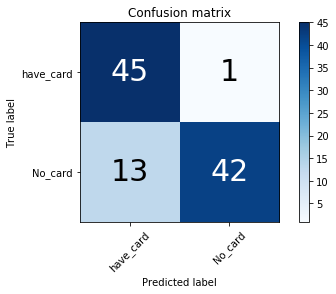

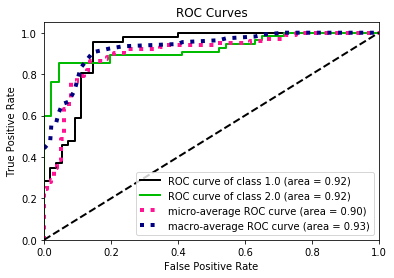

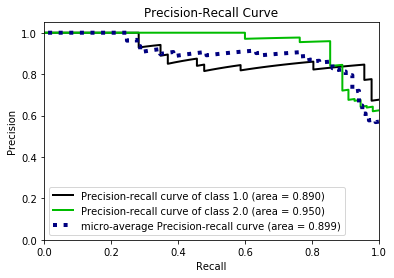

In [20]:
LR_model = LogisticRegression()
LR_model.fit(x_t,y_t)
#evaluating the model 
r = results_report(LR_model,y_te)
print(r)
models['Logistic Regression']=r
y_pred = LR_model.predict(x_te)
print(classification_report(y_te,y_pred,labels=list(set(flame.values[:,-1]))))
plot_curves(LR_model,y_te,x_te)  

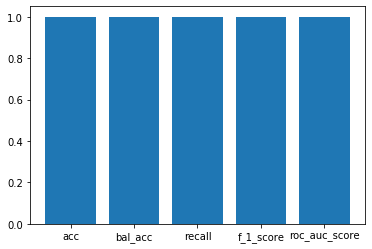

{'acc': 1.0, 'bal_acc': 1.0, 'recall': 1.0, 'f_1_score': 1.0, 'roc_auc_score': 1.0}
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        46
         2.0       1.00      1.00      1.00        55

    accuracy                           1.00       101
   macro avg       1.00      1.00      1.00       101
weighted avg       1.00      1.00      1.00       101



D:\annaconda\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=DeprecationWarning)


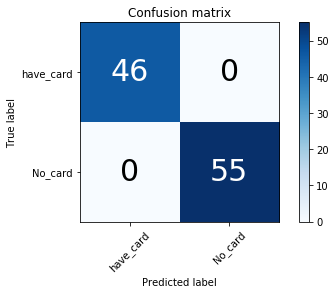

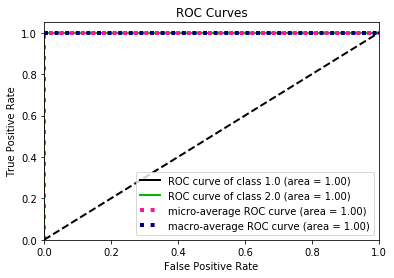

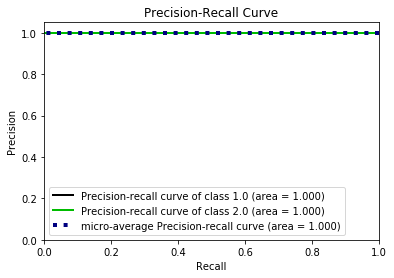

In [21]:
CART_model = DecisionTreeClassifier()
CART_model.fit(x_t,y_t)
#evaluating the model 
r = results_report(CART_model,y_te)
print(r)
models['CART']=r
y_pred = CART_model.predict(x_te)
print(classification_report(y_te,y_pred,labels=list(set(flame.values[:,-1]))))
plot_curves(CART_model,y_te,x_te)  

D:\annaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


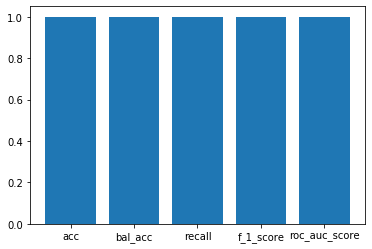

{'acc': 1.0, 'bal_acc': 1.0, 'recall': 1.0, 'f_1_score': 1.0, 'roc_auc_score': 1.0}
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        46
         2.0       1.00      1.00      1.00        55

    accuracy                           1.00       101
   macro avg       1.00      1.00      1.00       101
weighted avg       1.00      1.00      1.00       101



D:\annaconda\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=DeprecationWarning)


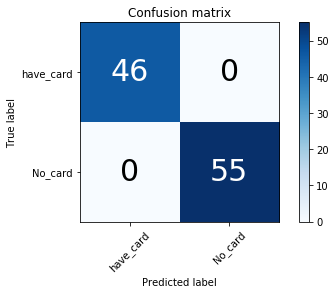

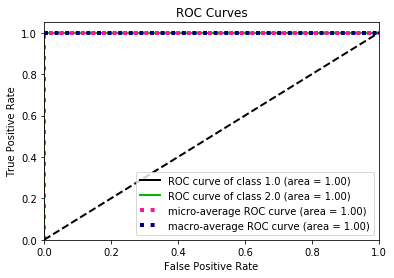

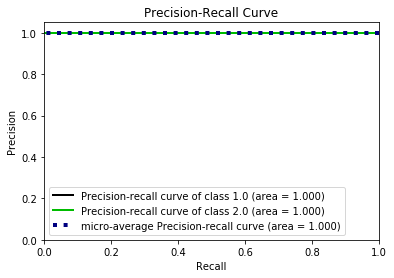

In [22]:
RF_model = RandomForestClassifier()
RF_model.fit(x_t,y_t)
#evaluating the model 
r = results_report(RF_model,y_te)
print(r)
models['Random Forest']=r
y_pred = RF_model.predict(x_te)
print(classification_report(y_te,y_pred,labels=list(set(flame.values[:,-1]))))
plot_curves(RF_model,y_te,x_te)

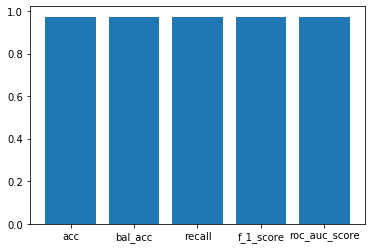

{'acc': 0.9702970297029703, 'bal_acc': 0.9702970297029703, 'recall': 0.9727272727272727, 'f_1_score': 0.9701918347270044, 'roc_auc_score': 0.9727272727272727}
              precision    recall  f1-score   support

         1.0       0.94      1.00      0.97        46
         2.0       1.00      0.95      0.97        55

    accuracy                           0.97       101
   macro avg       0.97      0.97      0.97       101
weighted avg       0.97      0.97      0.97       101



D:\annaconda\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=DeprecationWarning)


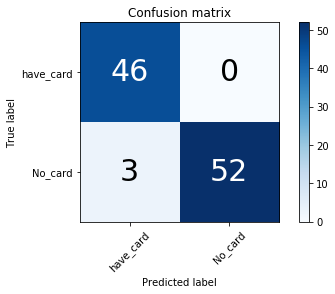

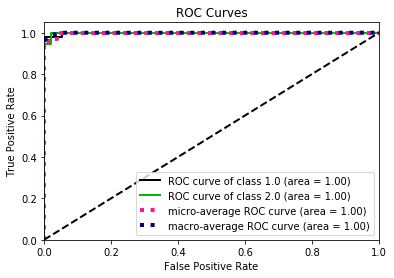

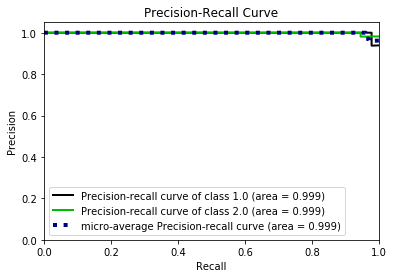

In [23]:
AB_model = AdaBoostClassifier()
AB_model.fit(x_t,y_t)
#evaluating the model 
r = results_report(AB_model,y_te)
print(r)
models['AdaBoost']=r
y_pred = AB_model.predict(x_te)
print(classification_report(y_te,y_pred,labels=list(set(flame.values[:,-1]))))
plot_curves(AB_model,y_te,x_te)

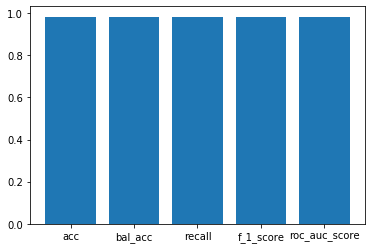

{'acc': 0.9801980198019802, 'bal_acc': 0.9801980198019802, 'recall': 0.9818181818181818, 'f_1_score': 0.9801024428684003, 'roc_auc_score': 0.9818181818181818}
              precision    recall  f1-score   support

         1.0       0.96      1.00      0.98        46
         2.0       1.00      0.96      0.98        55

    accuracy                           0.98       101
   macro avg       0.98      0.98      0.98       101
weighted avg       0.98      0.98      0.98       101



D:\annaconda\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=DeprecationWarning)


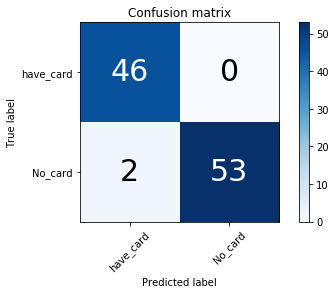

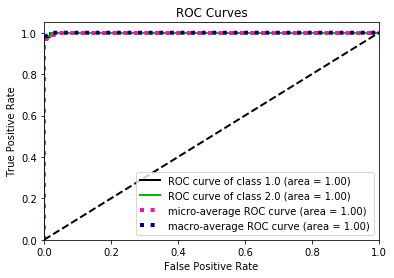

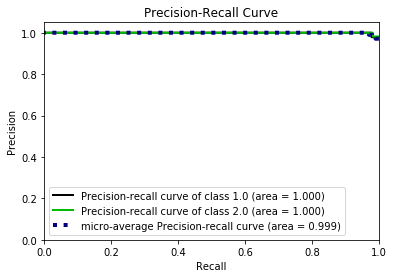

In [24]:
GB_model = GradientBoostingClassifier()
GB_model.fit(x_t,y_t)
#evaluating the model 
r = results_report(GB_model,y_te)
print(r)
models['GradBoost']=r
y_pred = GB_model.predict(x_te)
print(classification_report(y_te,y_pred,labels=list(set(flame.values[:,-1]))))
plot_curves(GB_model,y_te,x_te)

In [25]:
m = pd.DataFrame.from_dict(models).T
m = m.sort_values(by =list(m),ascending=False)
m

,acc,bal_acc,recall,f_1_score,roc_auc_score
KNN,1.000000,1.000000,1.000000,1.000000,1.000000
Non Linear SVM,1.000000,1.000000,1.000000,1.000000,1.000000
CART,1.000000,1.000000,1.000000,1.000000,1.000000
Random Forest,1.000000,1.000000,1.000000,1.000000,1.000000
GradBoost,0.980198,0.980198,0.981818,0.980102,0.981818
Naive Bayes,0.980198,0.980198,0.978261,0.979960,0.978261
QDA,0.980198,0.980198,0.978261,0.979960,0.978261
AdaBoost,0.970297,0.970297,0.972727,0.970192,0.972727
Logistic Regression,0.861386,0.861386,0.870949,0.861264,0.870949
LDA,0.861386,0.861386,0.869170,0.861373,0.869170
